In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

# ---
# Mouse
### Quake_Smart-seq2_Fat

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,organ,organism,platform,region
B15.MAA000385.3_10_M.1.1,myeloid cell,CL:0000763,myeloid cell,MAA000385,1.0,Quake_Smart-seq2_Fat,3_10_M,myeloid cell,M,Fat,Mus musculus,Smart-seq2,SCAT
D15.MAA000385.3_10_M.1.1,T cell,CL:0000084,T cell,MAA000385,5.0,Quake_Smart-seq2_Fat,3_10_M,,M,Fat,Mus musculus,Smart-seq2,SCAT
F15.MAA000385.3_10_M.1.1,B cell,CL:0000236,B cell,MAA000385,4.0,Quake_Smart-seq2_Fat,3_10_M,B cell,M,Fat,Mus musculus,Smart-seq2,SCAT
L15.MAA000385.3_10_M.1.1,myeloid cell,CL:0000763,myeloid cell,MAA000385,8.0,Quake_Smart-seq2_Fat,3_10_M,myeloid cell,M,Fat,Mus musculus,Smart-seq2,SCAT
O4.MAA000385.3_10_M.1.1,mesenchymal stem cell of adipose,CL:0002570,mesenchymal stem cell of adipose,MAA000385,7.0,Quake_Smart-seq2_Fat,3_10_M,mesenchymal progenitor,M,Fat,Mus musculus,Smart-seq2,SCAT


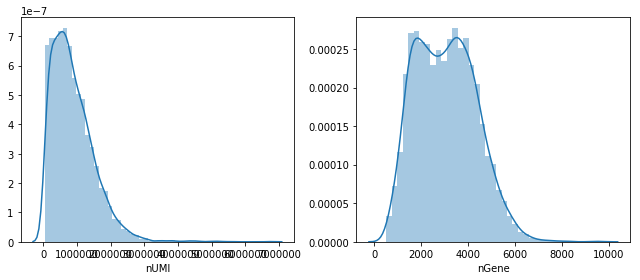

In [2]:
quake_smart_seq2_fat = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Fat/data.h5")
utils.peek(quake_smart_seq2_fat, "Quake_Smart-seq2_Fat")
quake_smart_seq2_fat = quake_smart_seq2_fat.normalize()
quake_smart_seq2_fat.obs.head()

In [3]:
opt_model_kwargs = dict(batch_effect="donor")
quake_smart_seq2_fat_model = cb.directi.fit_DIRECTi(
    quake_smart_seq2_fat, quake_smart_seq2_fat.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_Smart-seq2_Fat/model_0"
)
quake_smart_seq2_fat.latent = quake_smart_seq2_fat_model.inference(quake_smart_seq2_fat)

[DIRECTi epoch 0] train=2.774, val=2.776, time elapsed=2.0s Regular save...
[DIRECTi epoch 1] train=2.749, val=2.746, time elapsed=0.5s
[DIRECTi epoch 2] train=2.710, val=2.684, time elapsed=0.6s
[DIRECTi epoch 3] train=2.386, val=1.853, time elapsed=0.6s
[DIRECTi epoch 4] train=0.988, val=0.850, time elapsed=0.6s
[DIRECTi epoch 5] train=0.789, val=0.793, time elapsed=0.6s
[DIRECTi epoch 6] train=0.783, val=0.775, time elapsed=0.6s
[DIRECTi epoch 7] train=0.783, val=0.769, time elapsed=0.6s
[DIRECTi epoch 8] train=0.781, val=0.771, time elapsed=0.6s
[DIRECTi epoch 9] train=0.762, val=0.757, time elapsed=0.6s
[DIRECTi epoch 10] train=0.722, val=0.713, time elapsed=0.6s Regular save...
[DIRECTi epoch 11] train=0.713, val=0.760, time elapsed=0.5s
[DIRECTi epoch 12] train=0.707, val=0.694, time elapsed=0.5s
[DIRECTi epoch 13] train=0.700, val=0.794, time elapsed=0.6s
[DIRECTi epoch 14] train=0.698, val=0.690, time elapsed=0.6s
[DIRECTi epoch 15] train=0.692, val=0.687, time elapsed=0.6s
[D

[  Info   ] Computing tSNE...


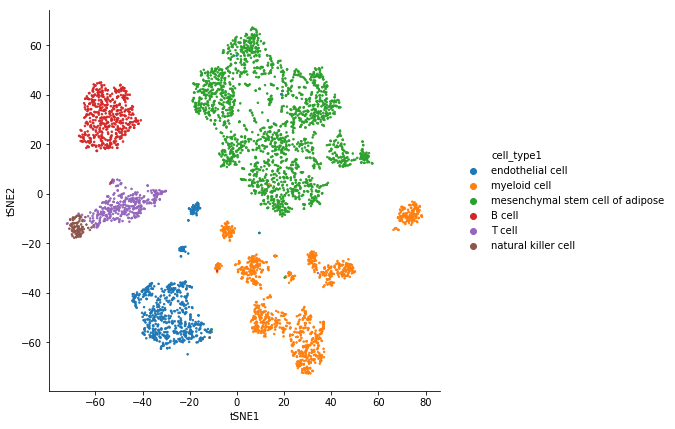

In [4]:
plot = quake_smart_seq2_fat.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_Smart-seq2_Fat/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


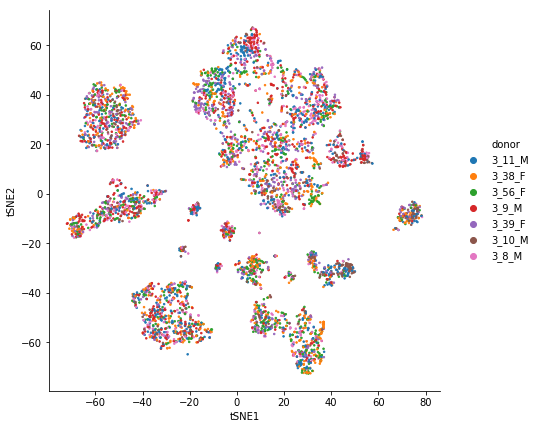

In [5]:
plot = quake_smart_seq2_fat.visualize_latent("donor")
plot.get_figure().savefig("Quake_Smart-seq2_Fat/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


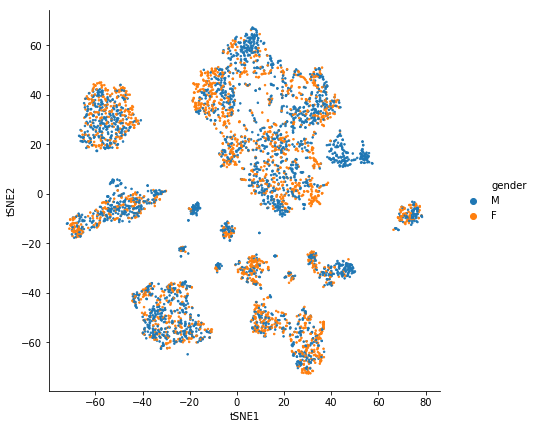

In [6]:
plot = quake_smart_seq2_fat.visualize_latent("gender")
plot.get_figure().savefig("Quake_Smart-seq2_Fat/gender.pdf", bbox_inches="tight")

In [7]:
%%capture capio
quake_smart_seq2_fat_models = [quake_smart_seq2_fat_model]
opt_model_kwargs = dict(batch_effect="donor")
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_smart_seq2_fat_models.append(cb.directi.fit_DIRECTi(
        quake_smart_seq2_fat, quake_smart_seq2_fat.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_Smart-seq2_Fat/model_%d" % i
    ))
quake_smart_seq2_fat_blast = cb.blast.BLAST(quake_smart_seq2_fat_models, quake_smart_seq2_fat, 
                                               keep_exprs=True).build_empirical()
quake_smart_seq2_fat_blast.save("Quake_Smart-seq2_Fat")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Fat/model_1/checkpoint-105
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Fat/model_2/checkpoint-154
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Fat/model_3/checkpoint-146


In [8]:
with open("Quake_Smart-seq2_Fat/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_Smart-seq2_Fat/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [9]:
utils.self_projection(quake_smart_seq2_fat_blast, "Quake_Smart-seq2_Fat")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9895
Accuracy = 0.9967
